In [11]:
import numpy as np

# --------- Fully Connected Layer ---------
class FCLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        # Update weights and biases
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error

        return input_error

# --------- Activation Layer ---------
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

# --------- Activation Functions ---------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

# --------- Loss Function: Mean Squared Error ---------
class Loss_MSE:
    def loss(self, y_true, y_pred):
        return np.mean(np.power(y_true - y_pred, 2))

    def loss_prime(self, y_true, y_pred):
        return 2 * (y_pred - y_true) / y_true.size

# --------- Neural Network Container ---------
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        result = input_data
        for layer in self.layers:
            result = layer.forward_propagation(result)
        return result

    def fit(self, x_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            err = 0
            for x, y in zip(x_train, y_train):
                output = x
                # Forward pass
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # Compute loss
                err += self.loss(y, output)

                # Backward pass
                error = self.loss_prime(y, output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            err /= len(x_train)
            print(f"Epoch {epoch+1}/{epochs}  |  Error = {err:.5f}")

# --------- Example: XOR Problem ---------
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

net = Network()
net.add(FCLayer(2, 3))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(3, 1))
net.add(ActivationLayer(sigmoid, sigmoid_prime))

net.use(Loss_MSE().loss, Loss_MSE().loss_prime)

net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)
out= net.predict(x_train)
print(out)

Epoch 1/1000  |  Error = 0.26233
Epoch 2/1000  |  Error = 0.26132
Epoch 3/1000  |  Error = 0.26047
Epoch 4/1000  |  Error = 0.25975
Epoch 5/1000  |  Error = 0.25914
Epoch 6/1000  |  Error = 0.25863
Epoch 7/1000  |  Error = 0.25820
Epoch 8/1000  |  Error = 0.25784
Epoch 9/1000  |  Error = 0.25754
Epoch 10/1000  |  Error = 0.25728
Epoch 11/1000  |  Error = 0.25707
Epoch 12/1000  |  Error = 0.25689
Epoch 13/1000  |  Error = 0.25675
Epoch 14/1000  |  Error = 0.25662
Epoch 15/1000  |  Error = 0.25652
Epoch 16/1000  |  Error = 0.25643
Epoch 17/1000  |  Error = 0.25636
Epoch 18/1000  |  Error = 0.25630
Epoch 19/1000  |  Error = 0.25625
Epoch 20/1000  |  Error = 0.25620
Epoch 21/1000  |  Error = 0.25617
Epoch 22/1000  |  Error = 0.25614
Epoch 23/1000  |  Error = 0.25611
Epoch 24/1000  |  Error = 0.25609
Epoch 25/1000  |  Error = 0.25607
Epoch 26/1000  |  Error = 0.25606
Epoch 27/1000  |  Error = 0.25605
Epoch 28/1000  |  Error = 0.25604
Epoch 29/1000  |  Error = 0.25603
Epoch 30/1000  |  Error

IMPLÉMENTATION FROM SCRATCH - RÉSEAUX DE NEURONES
Basé sur le cours: Les bases

RÉSOLUTION DU PROBLÈME XOR
Données d'entraînement:
Entrée -> Sortie attendue
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0

Construction du réseau de neurones...
Architecture du réseau:
- Couche d'entrée: 2 neurones
- Couche cachée: 3 neurones (activation: tanh)
- Couche de sortie: 1 neurone (activation: tanh)
- Fonction de perte: MSE

Début de l'entraînement...
Époque 1/1000, Erreur: 0.488113
Époque 101/1000, Erreur: 0.278947
Époque 201/1000, Erreur: 0.278776
Époque 301/1000, Erreur: 0.278775
Époque 401/1000, Erreur: 0.278787
Époque 501/1000, Erreur: 0.278798
Époque 601/1000, Erreur: 0.278804
Époque 701/1000, Erreur: 0.278807
Époque 801/1000, Erreur: 0.278807
Époque 901/1000, Erreur: 0.278806
Entraînement terminé. Erreur finale: 0.278805

TEST DU RÉSEAU ENTRAÎNÉ
Entrée -> Prédiction | Attendu | Erreur
---------------------------------------------
[0 0] ->   0.5233 |       0 | 0.5233
[0 1] ->   0.5264 |      

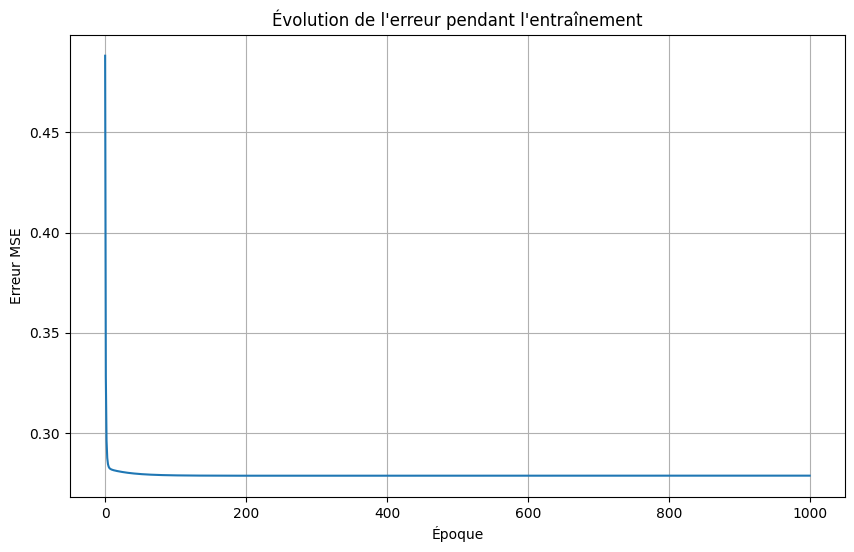


COMPARAISON D'ARCHITECTURES

Test architecture 2-2-1:
Erreur finale: 0.5000

Test architecture 2-4-1:
Erreur finale: 0.5000

Test architecture 2-8-1:
Erreur finale: 0.5000


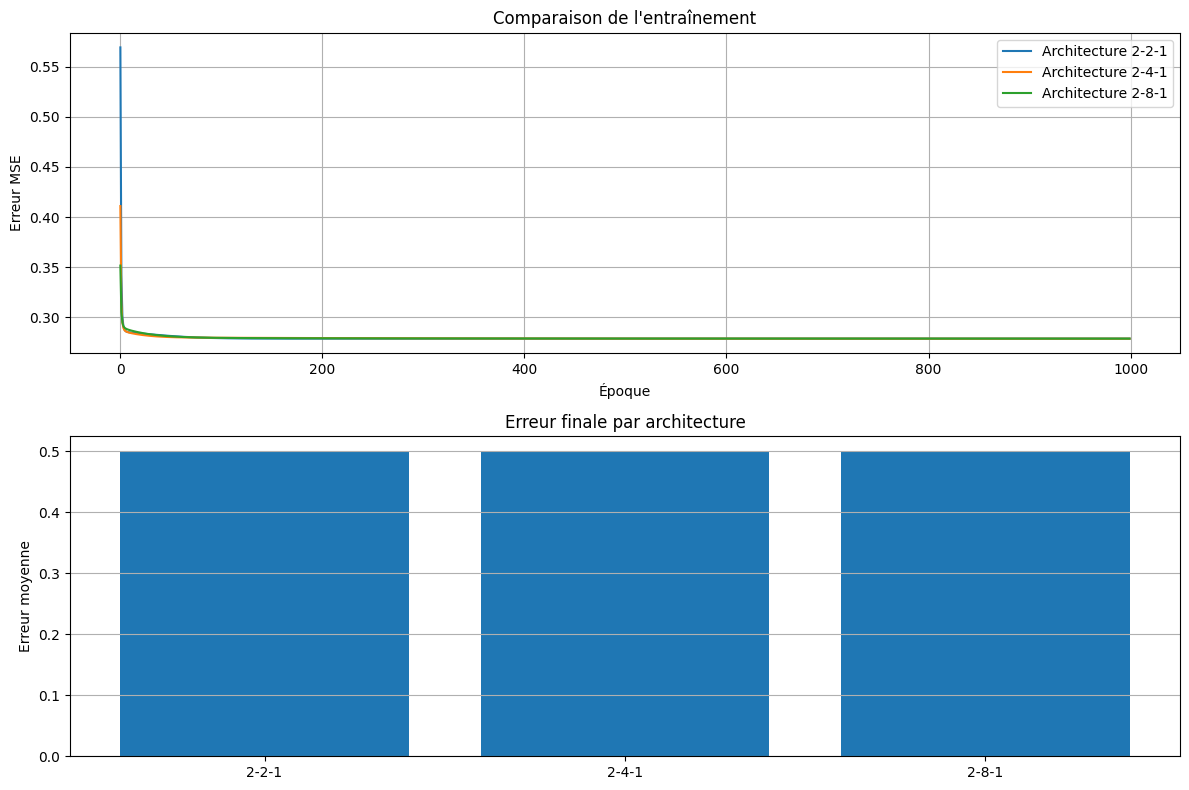


RÉSUMÉ DES CONCEPTS IMPLÉMENTÉS
✓ Perceptron et couches
✓ Propagation en avant (Forward propagation)
✓ Propagation en arrière (Backward propagation)
✓ Couche fully connected avec formules matricielles
✓ Couches d'activation (tanh, sigmoid, relu)
✓ Fonction de perte MSE
✓ Classe Network pour gérer l'entraînement
✓ Résolution du problème XOR

Le réseau a été implémenté exactement selon les formules du cours!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===== FONCTIONS D'ACTIVATION =====
class ActivationFunctions:
    """Fonctions d'activation et leurs dérivées"""

    @staticmethod
    def tanh(x):
        return np.tanh(x)

    @staticmethod
    def tanh_prime(x):
        return 1 - np.tanh(x) ** 2

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    @staticmethod
    def sigmoid_prime(x):
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_prime(x):
        return (x > 0).astype(float)

# ===== COUCHE FULLY CONNECTED =====
class FullyConnectedLayer:
    """
    Couche entièrement connectée (Dense Layer)
    Implémente les formules du cours:
    - Forward: Y = X * W + B
    - Backward: ∂E/∂W, ∂E/∂B, ∂E/∂X
    """

    def __init__(self, input_size, output_size):
        # Initialisation des poids et biais
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.bias = np.random.randn(1, output_size) * 0.1

        # Variables pour stocker les valeurs lors de la propagation
        self.input = None
        self.output = None

    def forward_propagation(self, input_data):
        """
        Propagation en avant
        Y = X * W + B
        """
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        """
        Propagation en arrière selon les formules du cours:

        ∂E/∂W = X^T * ∂E/∂Y
        ∂E/∂B = ∂E/∂Y
        ∂E/∂X = ∂E/∂Y * W^T
        """
        # Calcul des gradients
        input_error = np.dot(output_error, self.weights.T)  # ∂E/∂X
        weights_error = np.dot(self.input.T, output_error)  # ∂E/∂W
        bias_error = output_error  # ∂E/∂B

        # Mise à jour des paramètres
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * np.sum(bias_error, axis=0, keepdims=True)

        return input_error

# ===== COUCHE D'ACTIVATION =====
class ActivationLayer:
    """
    Couche d'activation
    Applique une fonction d'activation et sa dérivée
    """

    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
        self.input = None
        self.output = None

    def forward_propagation(self, input_data):
        """Propagation en avant: applique la fonction d'activation"""
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        """
        Propagation en arrière:
        ∂E/∂X = ∂E/∂Y * f'(X)
        """
        return self.activation_prime(self.input) * output_error

# ===== FONCTION DE PERTE MSE =====
def mse(y_true, y_pred):
    """
    Mean Squared Error
    MSE = (1/n) * Σ(y_true - y_pred)²
    """
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    """
    Dérivée de MSE
    ∂MSE/∂y_pred = 2(y_pred - y_true) / n
    """
    return 2 * (y_pred - y_true) / y_true.size

# ===== CLASSE NETWORK =====
class Network:
    """
    Réseau de neurones
    Gère l'ensemble des couches et l'entraînement
    """

    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        """Ajouter une couche au réseau"""
        self.layers.append(layer)

    def use(self, loss, loss_prime):
        """Définir la fonction de perte"""
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        """
        Prédiction: propagation en avant à travers toutes les couches
        """
        samples = len(input_data)
        result = []

        for i in range(samples):
            # Propagation en avant
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    def fit(self, x_train, y_train, epochs, learning_rate, verbose=True):
        """
        Entraînement du réseau

        Args:
            x_train: données d'entrée
            y_train: données de sortie attendues
            epochs: nombre d'époques
            learning_rate: taux d'apprentissage
            verbose: affichage des informations
        """
        samples = len(x_train)
        losses = []

        for i in range(epochs):
            err = 0
            for j in range(samples):
                # Propagation en avant
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # Calcul de l'erreur
                err += self.loss(y_train[j], output)

                # Propagation en arrière
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # Erreur moyenne
            err /= samples
            losses.append(err)

            if verbose and i % 100 == 0:
                print(f'Époque {i+1}/{epochs}, Erreur: {err:.6f}')

        if verbose:
            print(f'Entraînement terminé. Erreur finale: {err:.6f}')

        return losses

# ===== RÉSOUDRE LE PROBLÈME XOR =====
def solve_xor():
    """
    Résoudre le problème XOR avec le réseau de neurones
    Suivant exactement l'approche du cours
    """
    print("=" * 60)
    print("RÉSOLUTION DU PROBLÈME XOR")
    print("=" * 60)

    # Données d'entraînement XOR
    x_train = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]])
    y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

    print("Données d'entraînement:")
    print("Entrée -> Sortie attendue")
    for i in range(len(x_train)):
        print(f"{x_train[i][0]} -> {y_train[i][0][0]}")
    print()

    # Construction du réseau
    print("Construction du réseau de neurones...")
    network = Network()

    # Architecture: 2 -> 3 -> 1
    # Couche 1: 2 entrées -> 3 neurones cachés
    network.add(FullyConnectedLayer(2, 3))
    network.add(ActivationLayer(ActivationFunctions.tanh, ActivationFunctions.tanh_prime))

    # Couche 2: 3 neurones cachés -> 1 sortie
    network.add(FullyConnectedLayer(3, 1))
    network.add(ActivationLayer(ActivationFunctions.tanh, ActivationFunctions.tanh_prime))

    # Fonction de perte
    network.use(mse, mse_prime)

    print("Architecture du réseau:")
    print("- Couche d'entrée: 2 neurones")
    print("- Couche cachée: 3 neurones (activation: tanh)")
    print("- Couche de sortie: 1 neurone (activation: tanh)")
    print("- Fonction de perte: MSE")
    print()

    # Entraînement
    print("Début de l'entraînement...")
    losses = network.fit(x_train, y_train, epochs=1000, learning_rate=0.1, verbose=True)

    # Test du réseau entraîné
    print("\n" + "=" * 40)
    print("TEST DU RÉSEAU ENTRAÎNÉ")
    print("=" * 40)

    predictions = network.predict(x_train)

    print("Entrée -> Prédiction | Attendu | Erreur")
    print("-" * 45)

    total_error = 0
    for i in range(len(x_train)):
        pred = predictions[i][0][0]
        expected = y_train[i][0][0]
        error = abs(pred - expected)
        total_error += error

        print(f"{x_train[i][0]} -> {pred:8.4f} | {expected:7.0f} | {error:.4f}")

    print(f"\nErreur moyenne: {total_error / len(x_train):.4f}")

    # Visualisation de l'entraînement
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Évolution de l\'erreur pendant l\'entraînement')
    plt.xlabel('Époque')
    plt.ylabel('Erreur MSE')
    plt.grid(True)
    plt.show()

    return network, losses

# ===== EXEMPLE AVEC DIFFÉRENTES ARCHITECTURES =====
def compare_architectures():
    """
    Comparer différentes architectures pour XOR
    """
    print("\n" + "=" * 60)
    print("COMPARAISON D'ARCHITECTURES")
    print("=" * 60)

    # Données XOR
    x_train = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]])
    y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

    architectures = [
        {"name": "2-2-1", "hidden": 2},
        {"name": "2-4-1", "hidden": 4},
        {"name": "2-8-1", "hidden": 8}
    ]

    results = []

    for arch in architectures:
        print(f"\nTest architecture {arch['name']}:")

        # Créer le réseau
        network = Network()
        network.add(FullyConnectedLayer(2, arch['hidden']))
        network.add(ActivationLayer(ActivationFunctions.tanh, ActivationFunctions.tanh_prime))
        network.add(FullyConnectedLayer(arch['hidden'], 1))
        network.add(ActivationLayer(ActivationFunctions.tanh, ActivationFunctions.tanh_prime))
        network.use(mse, mse_prime)

        # Entraîner
        losses = network.fit(x_train, y_train, epochs=1000, learning_rate=0.1, verbose=False)

        # Tester
        predictions = network.predict(x_train)
        total_error = sum(abs(predictions[i][0][0] - y_train[i][0][0]) for i in range(len(x_train)))
        avg_error = total_error / len(x_train)

        results.append({
            "name": arch['name'],
            "losses": losses,
            "final_error": avg_error
        })

        print(f"Erreur finale: {avg_error:.4f}")

    # Visualisation comparative
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    for result in results:
        plt.plot(result['losses'], label=f"Architecture {result['name']}")
    plt.title('Comparaison de l\'entraînement')
    plt.xlabel('Époque')
    plt.ylabel('Erreur MSE')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    names = [r['name'] for r in results]
    errors = [r['final_error'] for r in results]
    plt.bar(names, errors)
    plt.title('Erreur finale par architecture')
    plt.ylabel('Erreur moyenne')
    plt.grid(True, axis='y')

    plt.tight_layout()
    plt.show()

    return results

# ===== FONCTION PRINCIPALE =====
def main():
    """Fonction principale suivant le cours"""
    print("IMPLÉMENTATION FROM SCRATCH - RÉSEAUX DE NEURONES")
    print("Basé sur le cours: Les bases")
    print()

    # Résoudre XOR
    network, losses = solve_xor()

    # Comparer les architectures
    comparison_results = compare_architectures()

    print("\n" + "=" * 60)
    print("RÉSUMÉ DES CONCEPTS IMPLÉMENTÉS")
    print("=" * 60)
    print("✓ Perceptron et couches")
    print("✓ Propagation en avant (Forward propagation)")
    print("✓ Propagation en arrière (Backward propagation)")
    print("✓ Couche fully connected avec formules matricielles")
    print("✓ Couches d'activation (tanh, sigmoid, relu)")
    print("✓ Fonction de perte MSE")
    print("✓ Classe Network pour gérer l'entraînement")
    print("✓ Résolution du problème XOR")
    print()


    return network, losses, comparison_results

# Exécution
if __name__ == "__main__":
    network, training_losses, arch_comparison = main()
